# 📍 8. Time Series & Forecasting (Optional but Useful)

## Concepts

Understanding the fundamental components of a time series is essential before applying forecasting models.

### 8.1. Stationarity

**Explanation:**
A time series is **stationary** if its statistical properties (mean, variance, and autocorrelation) remain constant over time. This means:
1.  **Constant Mean:** The average value around which the series fluctuates does not change over time.
2.  **Constant Variance:** The variability (spread) of the series around its mean does not change over time.
3.  **Constant Autocorrelation:** The correlation between the series and its lagged versions remains constant over time.

Many time series models (like AR, MA, ARMA) assume stationarity. Non-stationary series often need to be transformed (e.g., by differencing) to become stationary before modeling.

**Why is it important?**
* **Predictability:** Stationary series are easier to model and forecast because their future behavior is assumed to be similar to their past behavior.
* **Model Assumptions:** Many statistical models rely on the assumption of stationarity.

**Plots for Stationarity:**
We can visually inspect a time series for stationarity by looking at its plot over time.

* **Non-Stationary (with Trend):** A clear upward or downward drift in the mean.
* **Non-Stationary (with Seasonality):** Regular, predictable patterns repeating over fixed periods.
* **Non-Stationary (with Changing Variance):** The spread of the data widens or narrows over time.
* **Stationary:** Fluctuates around a constant mean with constant variance and no obvious patterns.


--- Time Series Concepts: Stationarity ---


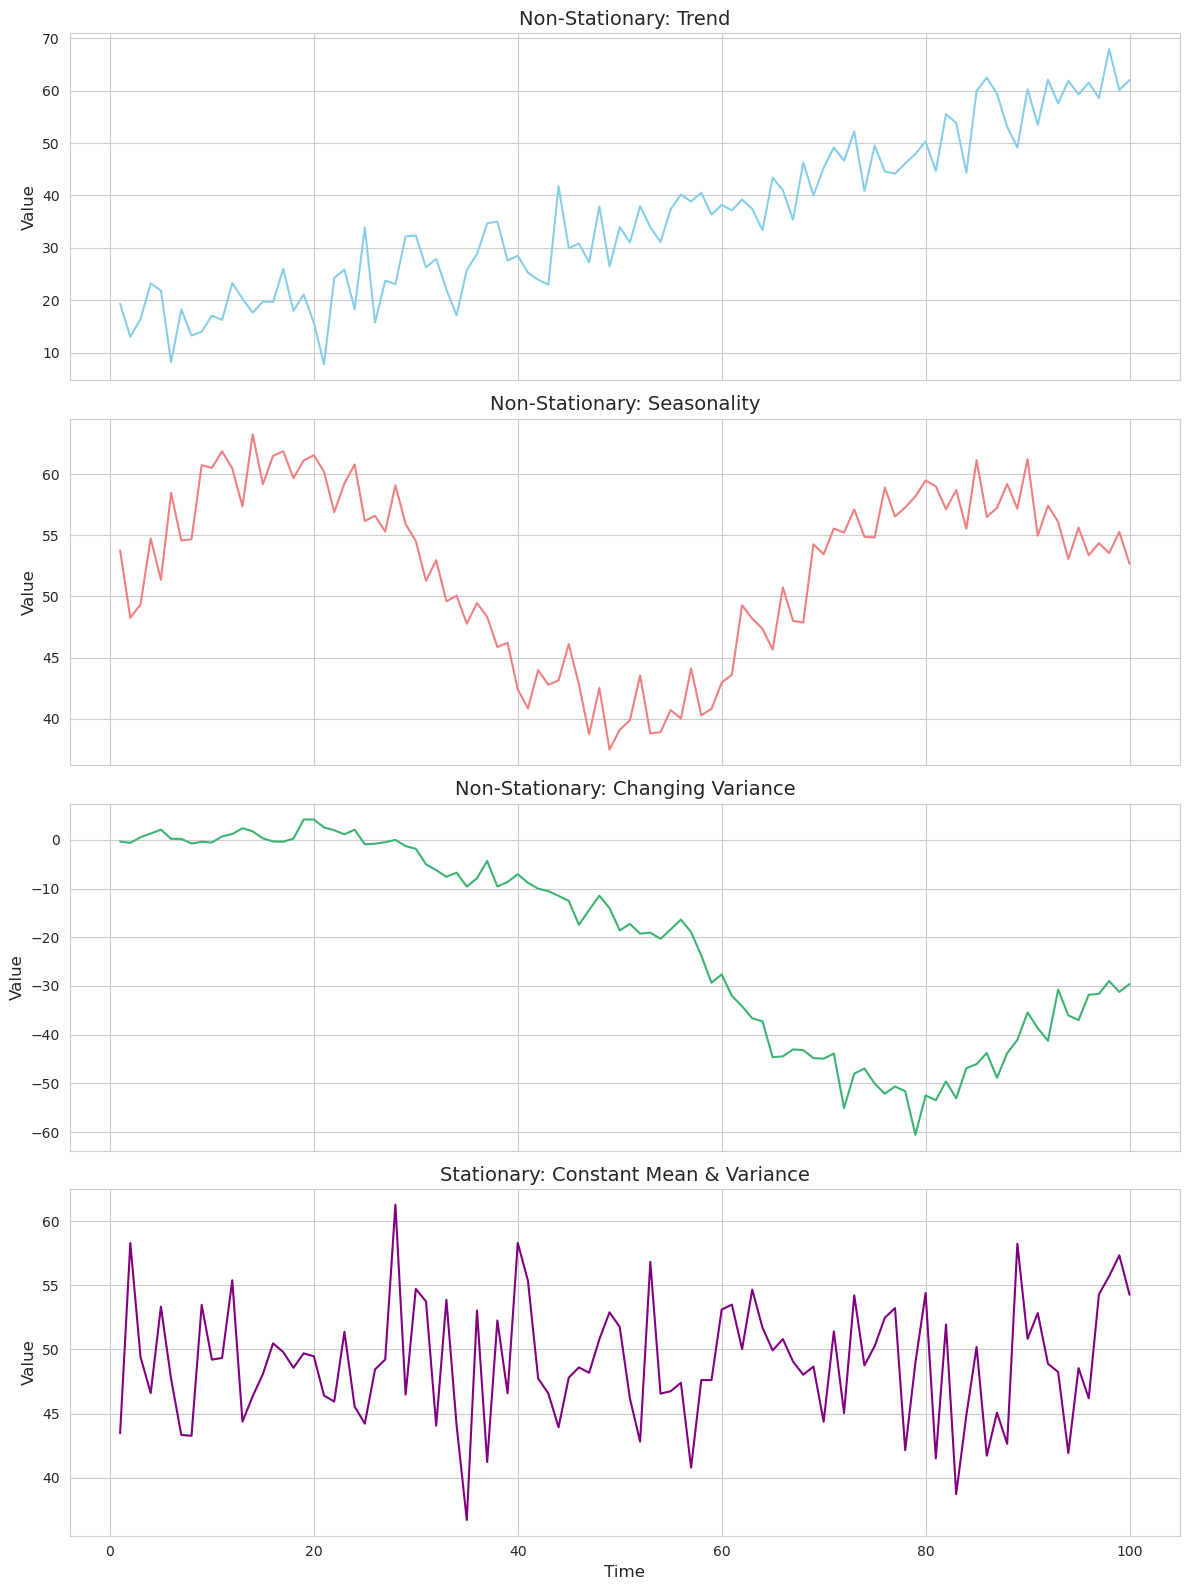

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

print("--- Time Series Concepts: Stationarity ---")

# Generate time points
time = np.arange(1, 101) # 100 data points

# 1. Non-Stationary (with Trend)
np.random.seed(0)
trend_data = 0.5 * time + 10 + np.random.normal(0, 5, len(time))

# 2. Non-Stationary (with Seasonality)
seasonality_data = 10 * np.sin(np.linspace(0, 3 * np.pi, len(time))) + np.random.normal(0, 2, len(time)) + 50

# 3. Non-Stationary (with Changing Variance - Heteroscedasticity)
variance_data = np.cumsum(np.random.normal(0, 1, len(time))) # Random walk
variance_data = variance_data * (np.linspace(1, 5, len(time))) # Variance increases over time

# 4. Stationary Data
stationary_data = np.random.normal(0, 5, len(time)) + 50 # Constant mean and variance

fig, axes = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

axes[0].plot(time, trend_data, color='skyblue')
axes[0].set_title('Non-Stationary: Trend', fontsize=14)
axes[0].set_ylabel('Value', fontsize=12)

axes[1].plot(time, seasonality_data, color='lightcoral')
axes[1].set_title('Non-Stationary: Seasonality', fontsize=14)
axes[1].set_ylabel('Value', fontsize=12)

axes[2].plot(time, variance_data, color='mediumseagreen')
axes[2].set_title('Non-Stationary: Changing Variance', fontsize=14)
axes[2].set_ylabel('Value', fontsize=12)

axes[3].plot(time, stationary_data, color='purple')
axes[3].set_title('Stationary: Constant Mean & Variance', fontsize=14)
axes[3].set_xlabel('Time', fontsize=12)
axes[3].set_ylabel('Value', fontsize=12)

plt.tight_layout()
plt.show()




### 8.2. Trend

**Explanation:**
A **trend** is a long-term increase or decrease in the data over time. It represents the underlying direction of the series.

  * **Upward Trend:** Values generally increase over time.
  * **Downward Trend:** Values generally decrease over time.
  * **Linear Trend:** The increase/decrease follows a straight line.
  * **Non-linear Trend:** The increase/decrease follows a curve (e.g., exponential, logarithmic).

Trends can be removed from a time series (detrending) to make it more stationary, often by differencing or by fitting a regression line and using the residuals.

**Example Problem Statement:** Monthly average temperature in a city over several decades.



--- Time Series Concepts: Trend ---


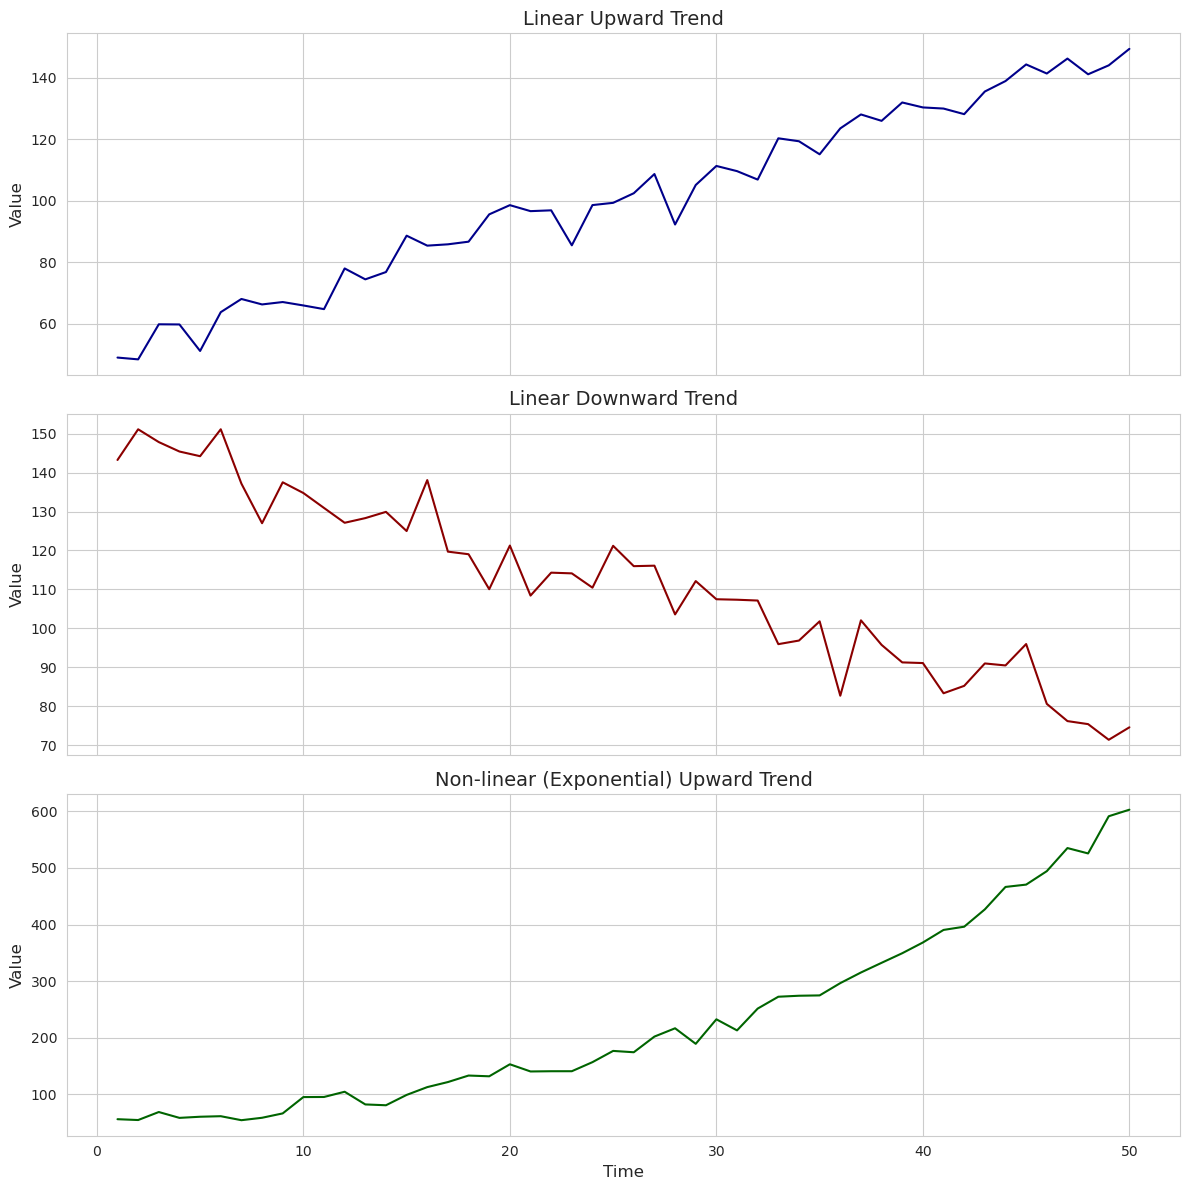

In [6]:

print("\n--- Time Series Concepts: Trend ---")

# Generate data with different trends
time_trend = np.arange(1, 51) # 50 time points

# Linear Upward Trend
linear_up_trend = 2 * time_trend + 50 + np.random.normal(0, 5, len(time_trend))

# Linear Downward Trend
linear_down_trend = -1.5 * time_trend + 150 + np.random.normal(0, 5, len(time_trend))

# Non-linear (Exponential) Upward Trend
exp_up_trend = 50 * np.exp(0.05 * time_trend) + np.random.normal(0, 10, len(time_trend))

fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

axes[0].plot(time_trend, linear_up_trend, color='darkblue')
axes[0].set_title('Linear Upward Trend', fontsize=14)
axes[0].set_ylabel('Value', fontsize=12)

axes[1].plot(time_trend, linear_down_trend, color='darkred')
axes[1].set_title('Linear Downward Trend', fontsize=14)
axes[1].set_ylabel('Value', fontsize=12)

axes[2].plot(time_trend, exp_up_trend, color='darkgreen')
axes[2].set_title('Non-linear (Exponential) Upward Trend', fontsize=14)
axes[2].set_xlabel('Time', fontsize=12)
axes[2].set_ylabel('Value', fontsize=12)

plt.tight_layout()
plt.show()


### 8.3. Seasonality

**Explanation:**
**Seasonality** refers to repetitive and predictable patterns or cycles in a time series that occur over a fixed period (e.g., daily, weekly, monthly, quarterly, yearly). These patterns are often driven by calendar-related effects.

  * **Daily Seasonality:** Peaks in morning and evening traffic on a website.
  * **Weekly Seasonality:** Higher sales on weekends.
  * **Monthly Seasonality:** Increased ice cream sales in summer months.
  * **Yearly Seasonality:** Retail sales peaking during holiday seasons.

Seasonality can be removed (deseasonalized) by methods like seasonal differencing or by using seasonal subseries plots.

**Example Problem Statement:** Monthly retail sales data showing consistent peaks around holidays.



--- Time Series Concepts: Seasonality ---


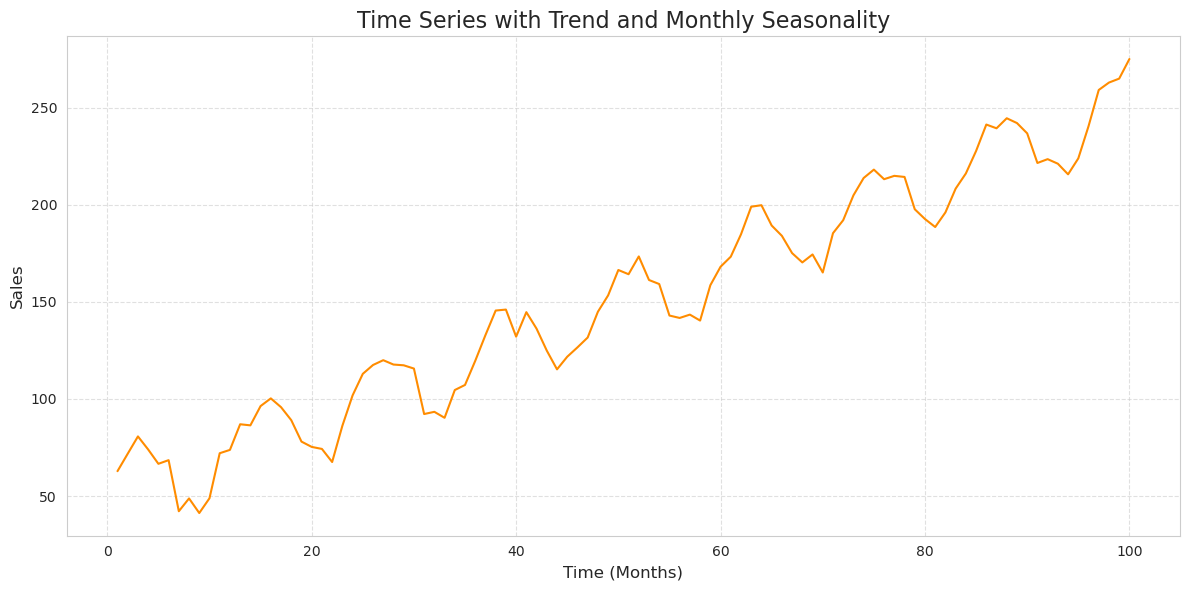

In [7]:
print("\n--- Time Series Concepts: Seasonality ---")

# Generate data with seasonality
time_season = np.arange(1, 101) # 100 data points (e.g., 8 years of monthly data)

# Monthly seasonality (12-month cycle) with a slight trend
seasonal_data = 2 * time_season + 50 + 20 * np.sin(2 * np.pi * time_season / 12) + np.random.normal(0, 5, len(time_season))

plt.figure(figsize=(12, 6))
plt.plot(time_season, seasonal_data, color='darkorange')
plt.title('Time Series with Trend and Monthly Seasonality', fontsize=16)
plt.xlabel('Time (Months)', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 8.4. Noise (Residuals)

**Explanation:**
**Noise** (also known as residuals or irregular component) is the random, unpredictable fluctuations in a time series that remain after accounting for trend, seasonality, and other systematic components. It represents what cannot be explained by the model.

  * Ideally, noise should be random and independent, without any discernible patterns.
  * If noise exhibits patterns (e.g., a trend or seasonality), it suggests that the model has not fully captured these components, and it might be underfitting.

**Example Problem Statement:** The unpredictable daily fluctuations in stock prices after accounting for long-term trends and any weekly/monthly patterns.



--- Time Series Concepts: Noise (Residuals) ---


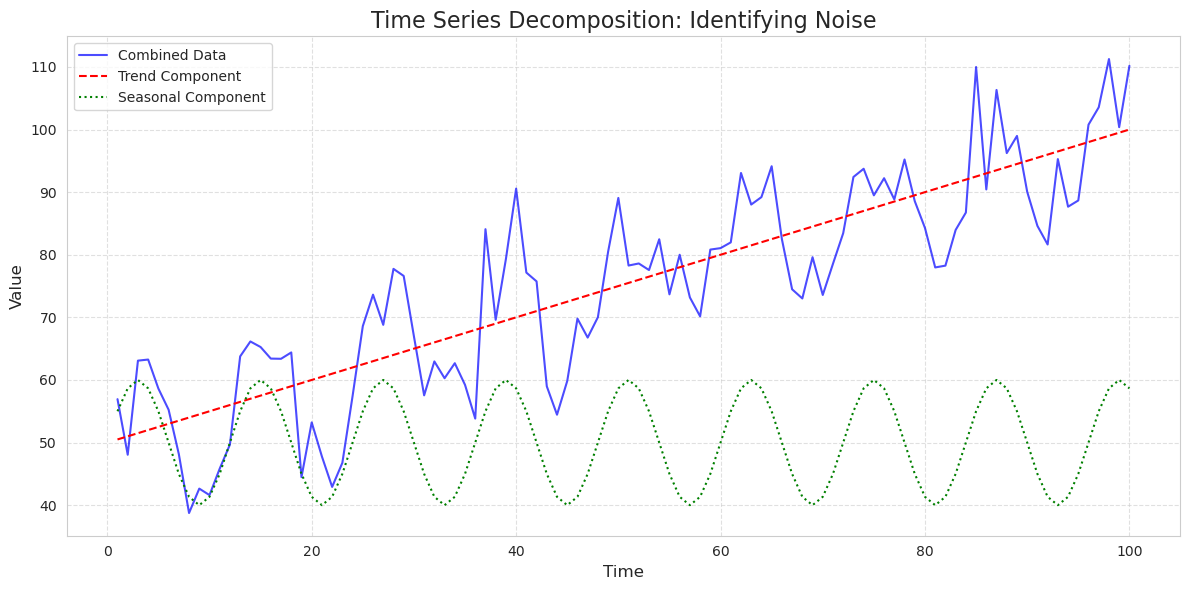

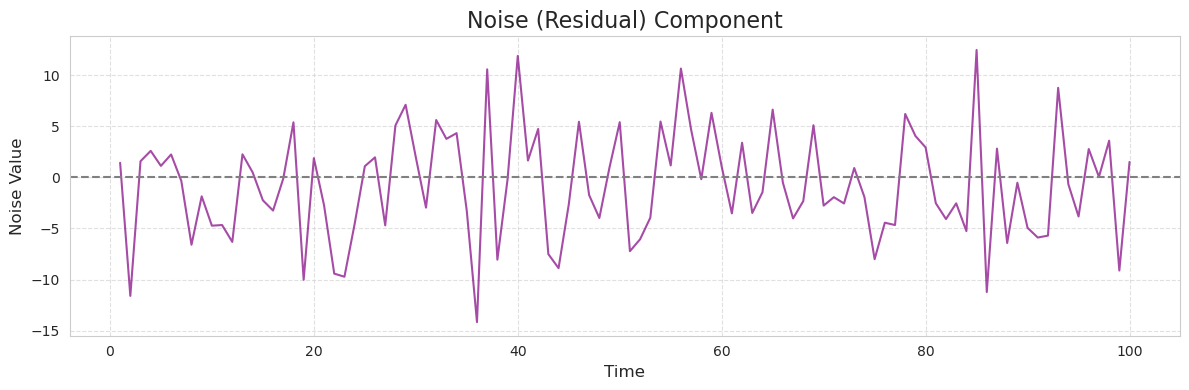

In [8]:
print("\n--- Time Series Concepts: Noise (Residuals) ---")

# Let's decompose a simple series to show noise
# Data with trend, seasonality, and noise
time_noise = np.arange(1, 101)
trend_comp = 0.5 * time_noise
seasonal_comp = 10 * np.sin(2 * np.pi * time_noise / 12)
noise_comp = np.random.normal(0, 5, len(time_noise))
combined_data = trend_comp + seasonal_comp + noise_comp + 50

plt.figure(figsize=(12, 6))
plt.plot(time_noise, combined_data, label='Combined Data', color='blue', alpha=0.7)
plt.plot(time_noise, trend_comp + 50, label='Trend Component', linestyle='--', color='red')
plt.plot(time_noise, seasonal_comp + 50, label='Seasonal Component', linestyle=':', color='green')
plt.title('Time Series Decomposition: Identifying Noise', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(time_noise, noise_comp, color='purple', alpha=0.7)
plt.axhline(0, color='gray', linestyle='--')
plt.title('Noise (Residual) Component', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Noise Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



## Models

Time series forecasting models capture the patterns (trend, seasonality, autocorrelation) in historical data to predict future values.

### 8.5. AR (AutoRegressive) Model

**Explanation:**
An **AutoRegressive (AR)** model predicts future values based on a linear combination of past values of the series itself. The "auto" refers to the regression of a variable on itself.
An AR(p) model means that the current value of the series is dependent on its previous 'p' values.

**Formula for AR(p):**
$$Y_t = c + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \dots + \phi_p Y_{t-p} + \epsilon_t$$
Where:

  * $Y_t$ is the value of the series at time $t$.
  * $c$ is a constant.
  * $\\phi_1, \\dots, \\phi_p$ are the autoregressive coefficients.
  * $Y_{t-1}, \\dots, Y_{t-p}$ are the past values (lags) of the series.
  * $\\epsilon_t$ is the white noise error term at time $t$.
  * $p$ is the order of the AR model (number of lagged observations used).

**Manual Calculation (Simple AR(1) Example):**

Consider a simple AR(1) model: $Y_t = 0.5 Y_{t-1} + \\epsilon_t$. Assume $Y_0 = 100$ and $\\epsilon_t$ are random errors.

**Problem Statement:** Given a series, predict the next few values using a simple AR(1) model.
Let's assume we have observed the following series: `[100, 103, 101, 104, 102]`
And we estimate the AR(1) coefficient $\\phi_1 = 0.5$ and constant $c=5$.
So, our model is $\\hat{Y}*t = 5 + 0.5 Y*{t-1}$.

**Forecast:**

  * $Y_5 = 102$ (last observed value)
  * $\hat{Y}_6 = 5 + 0.5 \times Y_5 = 5 + 0.5 \times 102 = 5 + 51 = \mathbf{56}$
  * $\hat{Y}_7 = 5 + 0.5 \times \hat{Y}_6 = 5 + 0.5 \times 56 = 5 + 28 = \mathbf{33}$
  * $\hat{Y}_8 = 5 + 0.5 \times \hat{Y}_7 = 5 + 0.5 \times 33 = 5 + 16.5 = \mathbf{21.5}$

*(Note: In real-world scenarios, $\\phi$ and $c$ are estimated from data using methods like Ordinary Least Squares (OLS) or Maximum Likelihood Estimation (MLE). The errors $\epsilon_t$ are assumed to be white noise.)*



**Python Code for AR Model (Simulation & Fitting):**



--- Time Series Models: AR (AutoRegressive) ---


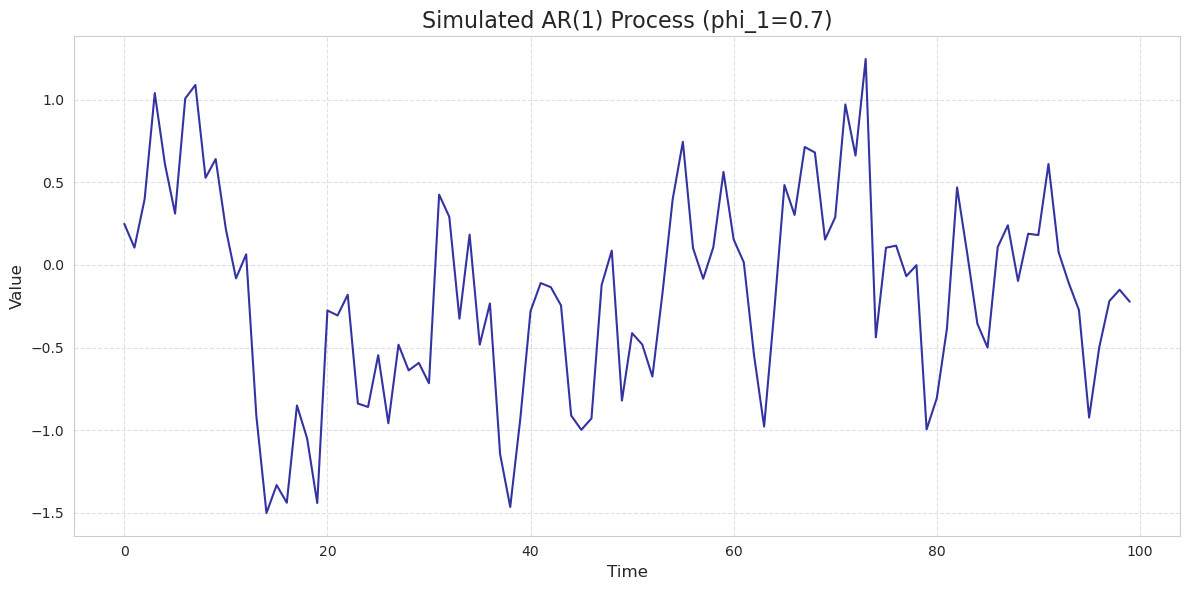


Fitted AR(1) Model Summary:
                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  200
Model:                     AutoReg(1)   Log Likelihood                -277.149
Method:               Conditional MLE   S.D. of innovations              0.974
Date:                Sat, 28 Jun 2025   AIC                            560.298
Time:                        23:23:38   BIC                            570.178
Sample:                             1   HQIC                           564.297
                                  200                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0728      0.070      1.042      0.297      -0.064       0.210
y.L1           0.5740      0.058      9.922      0.000       0.461       0.687
                       

AttributeError: 'AutoRegResults' object has no attribute 'lags'

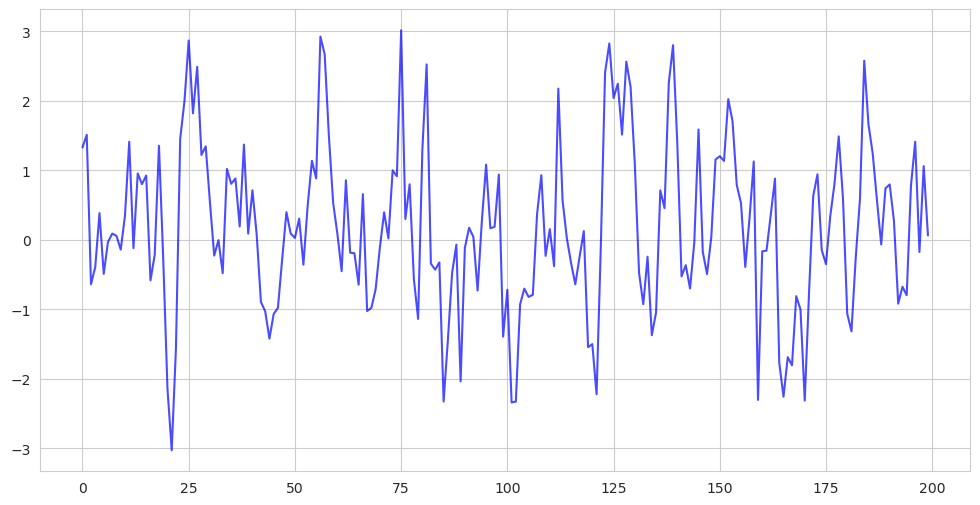

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.ar_model import AutoReg # For fitting AR models
from statsmo
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

print("\n--- Time Series Models: AR (AutoRegressive) ---")

# --- 1. Simulate an AR(1) process ---
np.random.seed(42)
ar_params = np.array([0.7]) # phi_1
ma_params = np.array([0]) # No MA component
ar_order = len(ar_params)
ma_order = len(ma_params)
n_samples = 100

# Generate AR(1) sample
# The 'ar' parameter is (1, -phi_1, -phi_2, ...), so for phi_1=0.7, it's [1, -0.7]
ar_process = arma_generate_sample(ar=np.r_[1, -ar_params], ma=np.r_[1, ma_params], nsample=n_samples, scale=0.5)

plt.figure(figsize=(12, 6))
plt.plot(ar_process, color='darkblue', alpha=0.8)
plt.title(f'Simulated AR(1) Process (phi_1={ar_params[0]})', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- 2. Fit an AR model to sample data ---
# Let's use a slightly longer series for fitting
np.random.seed(10)
ar_process_for_fit = arma_generate_sample(ar=np.r_[1, -np.array([0.6])], ma=np.r_[1, np.array([0])], nsample=200, scale=1.0)

# Fit AR(1) model
model_ar = AutoReg(ar_process_for_fit, lags=1, trend='c').fit() # lags=1 for AR(1), trend='c' for constant
print(f"\nFitted AR(1) Model Summary:")
print(model_ar.summary())

# Plot original series and 1-step-ahead predictions
plt.figure(figsize=(12, 6))
plt.plot(ar_process_for_fit, label='Original Series', color='blue', alpha=0.7)
plt.plot(model_ar.predict(start=model_ar.lags, end=len(ar_process_for_fit)-1), label='1-step-ahead Predictions', color='red', linestyle='--')
plt.title('AR(1) Model: Original vs. 1-step-ahead Predictions', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 8.6. MA (Moving Average) Model

**Explanation:**
A **Moving Average (MA)** model predicts future values based on a linear combination of past **error terms** (residuals from previous forecasts). It captures the short-term memory of a time series based on shocks or disturbances.
An MA(q) model means that the current value of the series is dependent on its previous 'q' error terms.

**Formula for MA(q):**
$$Y_t = c + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q}$$
Where:

  * $Y_t$ is the value of the series at time $t$.
  * $c$ is a constant.
  * $\\epsilon_t$ is the white noise error term at time $t$.
  * $\\epsilon_{t-1}, \\dots, \\epsilon_{t-q}$ are the past white noise error terms.
  * $\\theta_1, \\dots, \\theta_q$ are the moving average coefficients.
  * $q$ is the order of the MA model (number of lagged error terms used).

**Manual Calculation (Simple MA(1) Example):**

Consider a simple MA(1) model: $Y_t = 0.8 \\epsilon_{t-1} + \\epsilon_t$. Assume $\\epsilon_t$ are random errors with mean 0.
Let's say we have the following error terms:

  * $\\epsilon_0 = 0$ (initial error)
  * $\\epsilon_1 = 2$
  * $\\epsilon_2 = -1$
  * $\\epsilon_3 = 3$

**Problem Statement:** Given past error terms, calculate the series values using a simple MA(1) model.

**Calculate Series Values:**

  * $Y_1 = 0.8 \\times \\epsilon_0 + \\epsilon_1 = 0.8 \\times 0 + 2 = \\mathbf{2}$
  * $Y_2 = 0.8 \\times \\epsilon_1 + \\epsilon_2 = 0.8 \\times 2 + (-1) = 1.6 - 1 = \\mathbf{0.6}$
  * $Y_3 = 0.8 \\times \\epsilon_2 + \\epsilon_3 = 0.8 \\times (-1) + 3 = -0.8 + 3 = \\mathbf{2.2}$

*(Note: Forecasting with MA models involves estimating future error terms, which are typically assumed to be zero for steps beyond the observed 'q' errors. Fitting MA models is also done using MLE.)*


**Python Code for MA Model (Simulation & Fitting):**


--- Time Series Models: MA (Moving Average) ---


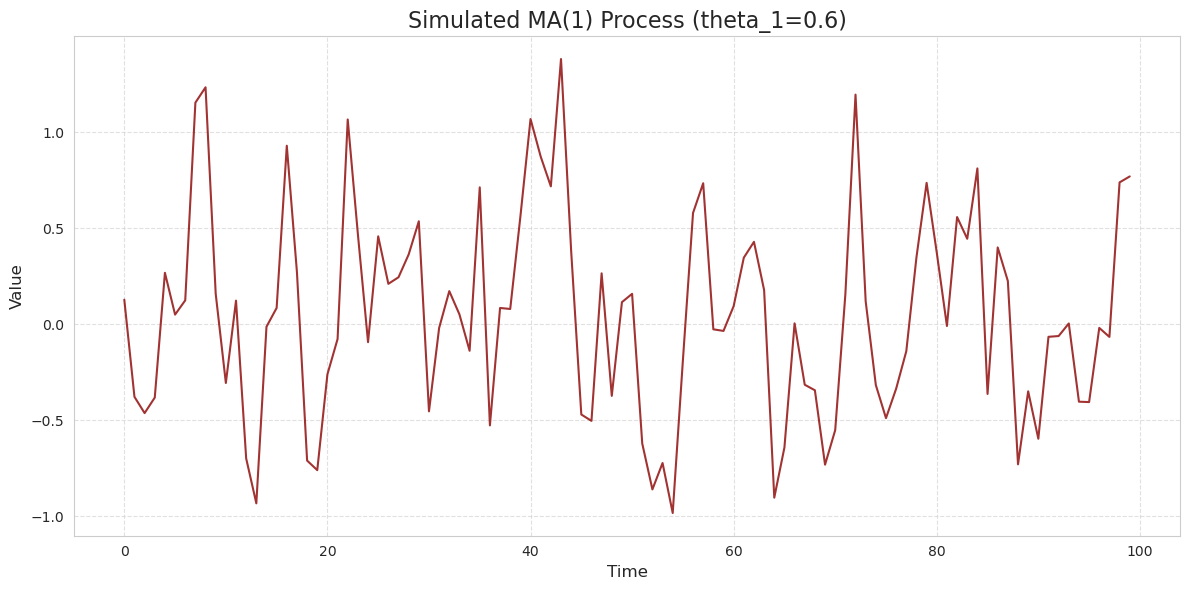


Fitted MA(1) Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -271.359
Date:                Sat, 28 Jun 2025   AIC                            548.718
Time:                        23:47:55   BIC                            558.613
Sample:                             0   HQIC                           552.723
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0161      0.103      0.157      0.875      -0.185       0.218
ma.L1          0.5491      0.055      9.967      0.000       0.441       0.657
sigma2         0.8815  

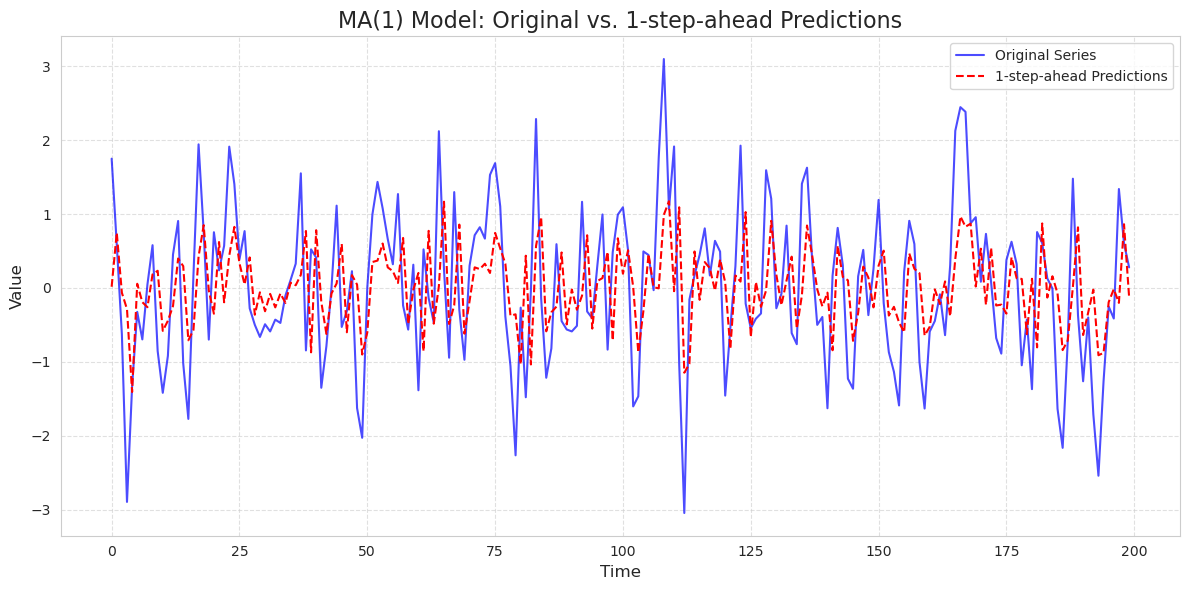

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA # ARIMA can fit MA models

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

print("\n--- Time Series Models: MA (Moving Average) ---")

# --- 1. Simulate an MA(1) process ---
np.random.seed(43)
ar_params = np.array([0]) # No AR component
ma_params = np.array([0.6]) # theta_1
ar_order = len(ar_params)
ma_order = len(ma_params)
n_samples = 100

# Generate MA(1) sample
# The 'ma' parameter is (1, theta_1, theta_2, ...), so for theta_1=0.6, it's [1, 0.6]
ma_process = arma_generate_sample(ar=np.r_[1, -ar_params], ma=np.r_[1, ma_params], nsample=n_samples, scale=0.5)

plt.figure(figsize=(12, 6))
plt.plot(ma_process, color='darkred', alpha=0.8)
plt.title(f'Simulated MA(1) Process (theta_1={ma_params[0]})', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- 2. Fit an MA model to sample data ---
np.random.seed(11)
ma_process_for_fit = arma_generate_sample(ar=np.r_[1, np.array([0])], ma=np.r_[1, np.array([0.5])], nsample=200, scale=1.0)

# Fit MA(1) model (ARIMA with p=0, d=0, q=1)
model_ma = ARIMA(ma_process_for_fit, order=(0, 0, 1), trend='c').fit()
print(f"\nFitted MA(1) Model Summary:")
print(model_ma.summary())

# Plot original series and 1-step-ahead predictions
plt.figure(figsize=(12, 6))
plt.plot(ma_process_for_fit, label='Original Series', color='blue', alpha=0.7)
plt.plot(model_ma.predict(start=0, end=len(ma_process_for_fit)-1), label='1-step-ahead Predictions', color='red', linestyle='--')
plt.title('MA(1) Model: Original vs. 1-step-ahead Predictions', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()




### 8.7. ARMA (AutoRegressive Moving Average) Model

**Explanation:**
An **AutoRegressive Moving Average (ARMA)** model combines both AR and MA components. It's used for stationary time series. An ARMA(p, q) model uses 'p' lagged values of the series and 'q' lagged error terms to predict the current value.

**Formula for ARMA(p, q):**
$$Y_t = c + \phi_1 Y_{t-1} + \dots + \phi_p Y_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q}$$
Where:

  * $Y_t$ is the value of the series at time $t$.
  * $c$ is a constant.
  * $\\phi$ are AR coefficients, $Y$ are lagged values.
  * $\\theta$ are MA coefficients, $\\epsilon$ are lagged error terms.
  * $\\epsilon_t$ is the current white noise error term.
  * $p$ is the AR order, $q$ is the MA order.

**Manual Calculation:**
Manually calculating ARMA models is extremely complex as it involves iterative optimization (e.g., Maximum Likelihood Estimation) to find the coefficients. It's not practical to do by hand beyond conceptual understanding.

**Problem Statement:** A financial analyst wants to model stock price fluctuations that exhibit both dependence on past prices and past shocks.


**Python Code for ARMA Model (Simulation & Fitting):**


--- Time Series Models: ARMA (AutoRegressive Moving Average) ---


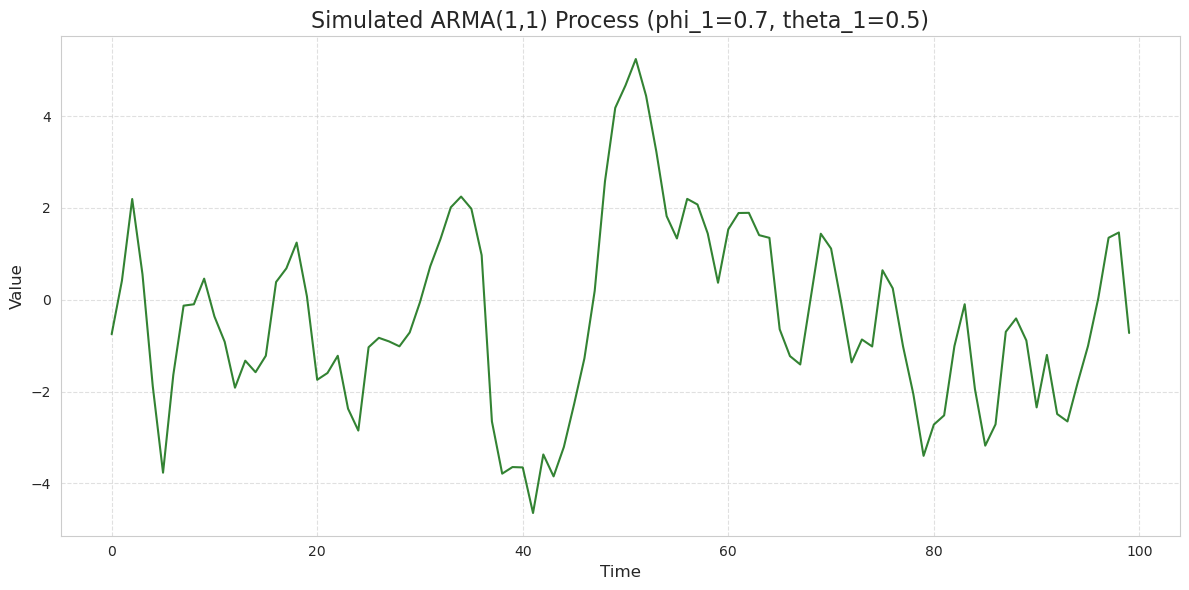


Fitted ARMA(1,1) Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -291.302
Date:                Sat, 28 Jun 2025   AIC                            590.604
Time:                        23:48:35   BIC                            603.797
Sample:                             0   HQIC                           595.943
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4920      0.197     -2.496      0.013      -0.878      -0.106
ar.L1          0.4727      0.087      5.417      0.000       0.302       0.644
ma.L1          0.41

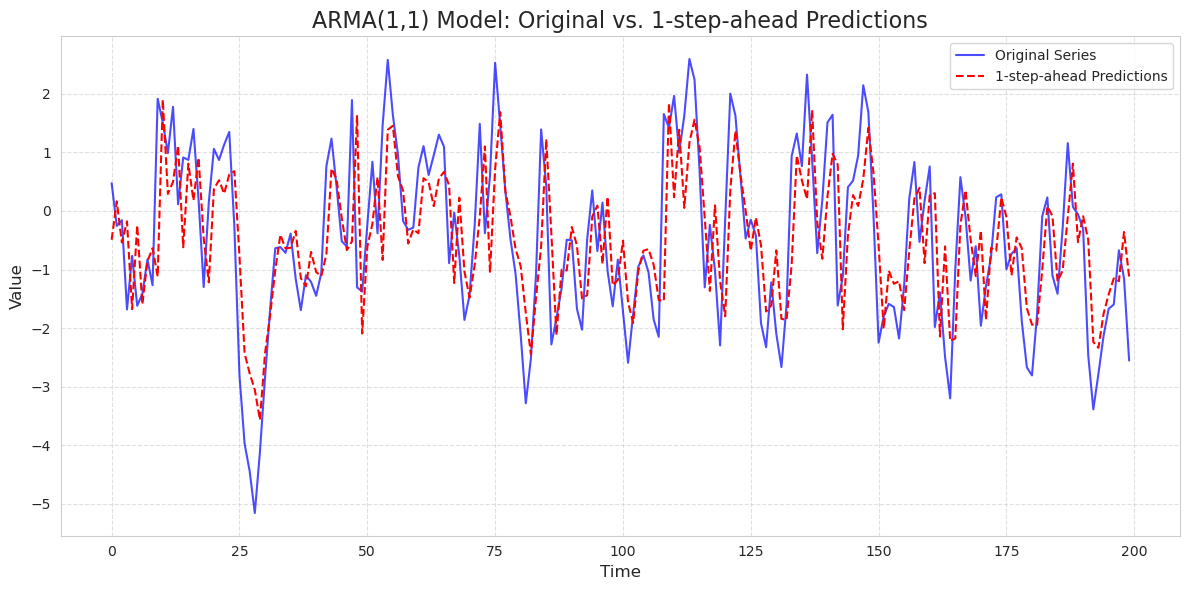

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA # ARIMA can fit ARMA models

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

print("\n--- Time Series Models: ARMA (AutoRegressive Moving Average) ---")

# --- 1. Simulate an ARMA(1,1) process ---
np.random.seed(44)
ar_params = np.array([0.7]) # phi_1
ma_params = np.array([0.5]) # theta_1
ar_order = len(ar_params)
ma_order = len(ma_params)
n_samples = 100

# Generate ARMA(1,1) sample
# ar parameter is (1, -phi_1, ...), ma parameter is (1, theta_1, ...)
arma_process = arma_generate_sample(ar=np.r_[1, -ar_params], ma=np.r_[1, ma_params], nsample=n_samples, scale=1.0)

plt.figure(figsize=(12, 6))
plt.plot(arma_process, color='darkgreen', alpha=0.8)
plt.title(f'Simulated ARMA(1,1) Process (phi_1={ar_params[0]}, theta_1={ma_params[0]})', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- 2. Fit an ARMA model to sample data ---
np.random.seed(12)
arma_process_for_fit = arma_generate_sample(ar=np.r_[1, -np.array([0.5])], ma=np.r_[1, np.array([0.4])], nsample=200, scale=1.0)

# Fit ARMA(1,1) model (ARIMA with p=1, d=0, q=1)
model_arma = ARIMA(arma_process_for_fit, order=(1, 0, 1), trend='c').fit()
print(f"\nFitted ARMA(1,1) Model Summary:")
print(model_arma.summary())

# Plot original series and 1-step-ahead predictions
plt.figure(figsize=(12, 6))
plt.plot(arma_process_for_fit, label='Original Series', color='blue', alpha=0.7)
plt.plot(model_arma.predict(start=0, end=len(arma_process_for_fit)-1), label='1-step-ahead Predictions', color='red', linestyle='--')
plt.title('ARMA(1,1) Model: Original vs. 1-step-ahead Predictions', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()




### 8.8. ARIMA (AutoRegressive Integrated Moving Average) Model

**Explanation:**
**AutoRegressive Integrated Moving Average (ARIMA)** is an extension of the ARMA model that can handle **non-stationary** time series. The "I" stands for "Integrated," which refers to the use of **differencing** to make the series stationary.

An ARIMA model is typically denoted as ARIMA(p, d, q):

  * **p:** The order of the AutoRegressive (AR) part (number of lagged observations).
  * **d:** The order of differencing (number of times the raw observations are differenced to achieve stationarity).
  * **q:** The order of the Moving Average (MA) part (number of lagged forecast errors).

**Differencing:**
Differencing involves computing the difference between consecutive observations.

  * **First-order differencing:** $Y'*t = Y_t - Y*{t-1}$ (removes linear trend)
  * **Second-order differencing:** $Y''_t = Y'*t - Y'*{t-1}$ (removes quadratic trend)
  * **Seasonal differencing:** $Y'*t = Y_t - Y*{t-L}$ (removes seasonality of period L)

**Manual Calculation (Differencing Step):**

**Problem Statement:** A company's monthly sales data shows a clear upward trend. Make the series stationary using first-order differencing.

Sales Data: `[100, 110, 125, 130, 140, 155]`

**First-order Differencing:**

  * $Y'_2 = Y_2 - Y_1 = 110 - 100 = \\mathbf{10}$
  * $Y'_3 = Y_3 - Y_2 = 125 - 110 = \\mathbf{15}$
  * $Y'_4 = Y_4 - Y_3 = 130 - 125 = \\mathbf{5}$
  * $Y'_5 = Y_5 - Y_4 = 140 - 130 = \\mathbf{10}$
  * $Y'_6 = Y_6 - Y_5 = 155 - 140 = \\mathbf{15}$

The differenced series is: `[10, 15, 5, 10, 15]`. This series now fluctuates around a constant mean (no trend).

*(Note: After differencing, the stationary series is then modeled using ARMA(p, q). The forecast from the ARMA model is then "integrated" back to the original scale by reversing the differencing operation.)*


**Python Code for ARIMA Model (Differencing & Fitting):**


--- Time Series Models: ARIMA (AutoRegressive Integrated Moving Average) ---


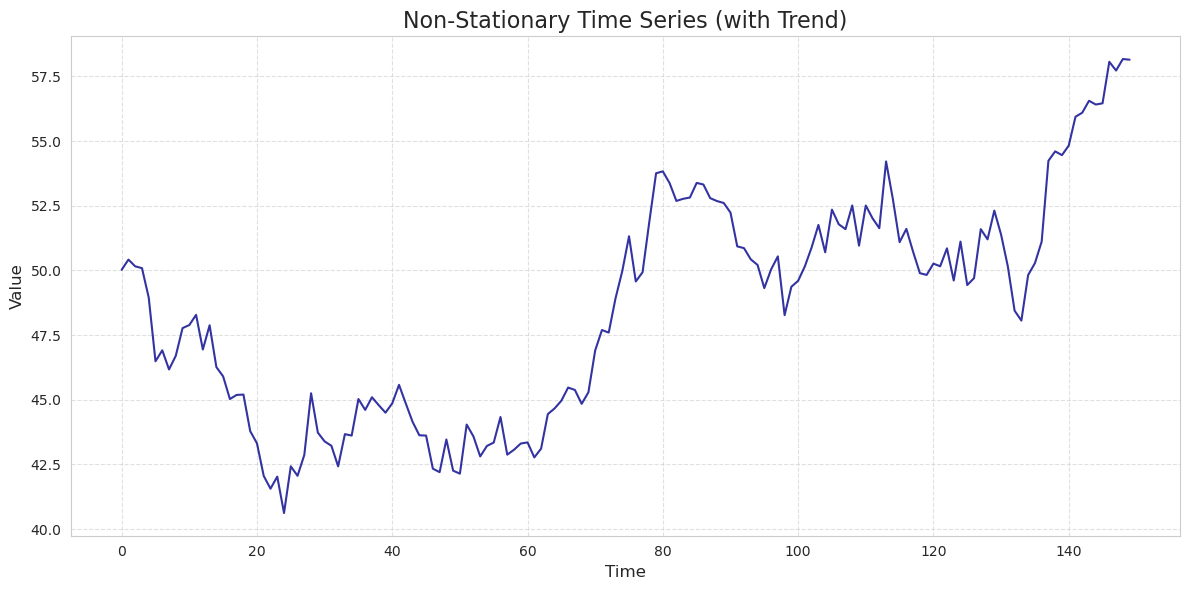

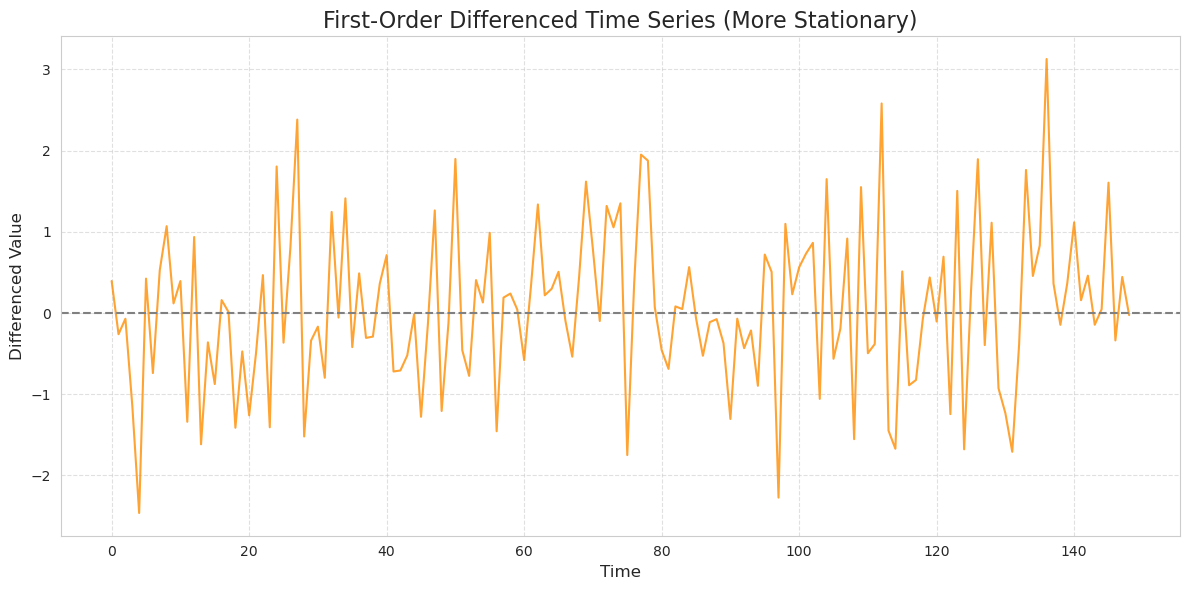


Fitted ARIMA(1,1,1) Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -347.539
Date:                Sat, 28 Jun 2025   AIC                            703.078
Time:                        23:16:53   BIC                            716.251
Sample:                             0   HQIC                           708.409
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1674      0.202     -0.827      0.408      -0.564       0.229
ar.L1          0.6244      0.140      4.451      0.000       0.349       0.899
ma.L1         -0

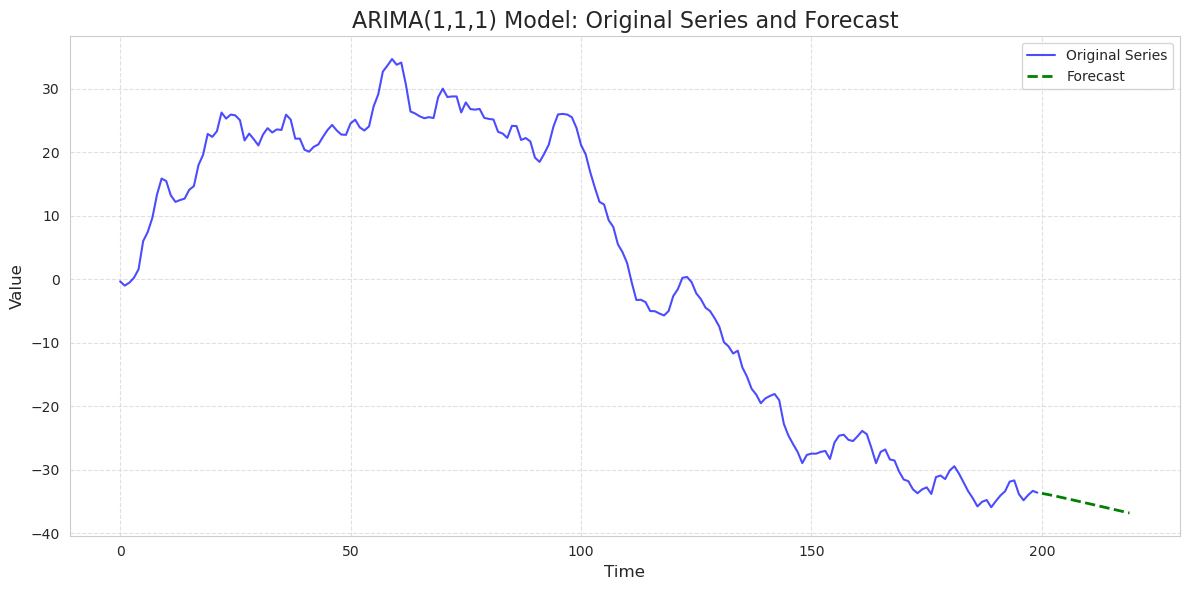

In [4]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import arma_generate_sample


sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

print("\n--- Time Series Models: ARIMA (AutoRegressive Integrated Moving Average) ---")

# --- 1. Simulate a non-stationary process (e.g., random walk with drift) ---
np.random.seed(45)
n_samples = 150
non_stationary_data = np.cumsum(np.random.normal(0, 1, n_samples)) + np.linspace(0, 20, n_samples) + 50

plt.figure(figsize=(12, 6))
plt.plot(non_stationary_data, color='darkblue', alpha=0.8)
plt.title('Non-Stationary Time Series (with Trend)', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- 2. Apply differencing to achieve stationarity ---
differenced_data = np.diff(non_stationary_data, n=1) # First-order differencing

plt.figure(figsize=(12, 6))
plt.plot(differenced_data, color='darkorange', alpha=0.8)
plt.axhline(0, color='gray', linestyle='--')
plt.title('First-Order Differenced Time Series (More Stationary)', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Differenced Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- 3. Fit an ARIMA model ---
# Let's use a simulated ARIMA(1,1,1) process for fitting
np.random.seed(13)
# AR(1) param = 0.7, MA(1) param = 0.5, d=1 (integrated)
# This is a bit complex to generate directly as ARIMA, so we'll simulate a stationary ARMA and then cumsum it
# For demonstration purposes, let's create a non-stationary series that can be made stationary with 1 diff
ar_param_sim = np.array([0.6])
ma_param_sim = np.array([0.4])
stationary_part = arma_generate_sample(ar=np.r_[1, -ar_param_sim], ma=np.r_[1, ma_param_sim], nsample=200, scale=1.0)
arima_process_for_fit = np.cumsum(stationary_part) + np.random.normal(0, 0.5, 200) # Add a slight random walk on top

# Fit ARIMA(1,1,1) model (p=1, d=1, q=1)
# The 'd' parameter handles the differencing internally
model_arima = ARIMA(arima_process_for_fit, order=(1, 1, 1), trend='t').fit()

# model_arima = ARIMA(arima_process_for_fit, order=(1, 1, 1), trend='c').fit()
print(f"\nFitted ARIMA(1,1,1) Model Summary:")
print(model_arima.summary())

# Plot original series and forecasts
plt.figure(figsize=(12, 6))
plt.plot(arima_process_for_fit, label='Original Series', color='blue', alpha=0.7)
# Get forecasts for a future period
forecast_steps = 20
forecast_result = model_arima.forecast(steps=forecast_steps)
plt.plot(np.arange(len(arima_process_for_fit), len(arima_process_for_fit) + forecast_steps),
         forecast_result, label='Forecast', color='green', linestyle='--', linewidth=2)
plt.title('ARIMA(1,1,1) Model: Original Series and Forecast', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 8.9. Exponential Smoothing

**Explanation:**
Exponential smoothing methods are a family of forecasting techniques that assign exponentially decreasing weights to past observations. More recent observations are given more weight than older observations. This makes them particularly effective for data with trend and/or seasonality.

**Types of Exponential Smoothing:**

1.  **Simple Exponential Smoothing (SES):**

      * For series with **no trend and no seasonality**.
      * Forecast is a weighted average of past observations, with weights decaying exponentially.
      * Formula: $\\hat{Y}_{t+1} = \\alpha Y_t + (1 - \\alpha) \\hat{Y}_t$
          * $\\hat{Y}_{t+1}$: Forecast for the next period.
          * $Y_t$: Actual observation at time $t$.
          * $\\hat{Y}_t$: Forecast for time $t$.
          * $\\alpha$: Smoothing parameter (alpha), between 0 and 1. A higher $\\alpha$ means more weight on recent observations.

2.  **Holt's Linear Trend Method:**

      * For series with a **trend but no seasonality**.
      * Involves two smoothing parameters: one for the level ($\\alpha$) and one for the trend ($\\beta$).

3.  **Holt-Winters' Seasonal Method:**

      * For series with **trend and/or seasonality**.
      * Involves three smoothing parameters: one for the level ($\\alpha$), one for the trend ($\\beta$), and one for the seasonal component ($\\gamma$).
      * Can be additive (seasonal fluctuations are constant in magnitude) or multiplicative (seasonal fluctuations change with the level of the series).

**Manual Calculation (Simple Exponential Smoothing - SES):**

**Problem Statement:** Forecast the next sales value using SES with $\\alpha = 0.3$. Assume the initial forecast $\\hat{Y}_1 = 100$.

Sales Data: `[105, 110, 108, 115, 112]`

**Forecast:**

  * $\hat{Y}_1 = 100$ (given initial forecast)
  * $\hat{Y}_2 = \\alpha Y_1 + (1 - \alpha) \hat{Y}_1 = 0.3 \times 105 + (1 - 0.3) \times 100 = 31.5 + 70 = \mathbf{101.5}$
  * $\hat{Y}_3 = \\alpha Y_2 + (1 - \alpha) \hat{Y}_2 = 0.3 \times 110 + (1 - 0.3) \times 101.5 = 33 + 71.05 = \mathbf{104.05}$
  * $\hat{Y}_4 = \\alpha Y_3 + (1 - \alpha) \hat{Y}_3 = 0.3 \times 108 + (1 - 0.3) \times 104.05 = 32.4 + 72.835 = \mathbf{105.235}$
  * $\hat{Y}_5 = \\alpha Y_4 + (1 - \alpha) \hat{Y}_4 = 0.3 \times 115 + (1 - 0.3) \times 105.235 = 34.5 + 73.6645 = \mathbf{108.1645}$
  * **Forecast for $Y_6$**: $\hat{Y}_6 = \alpha Y_5 + (1 - \alpha) \hat{Y}_5 = 0.3 \times 112 + (1 - 0.3) \times 108.1645 = 33.6 + 75.71515 = \mathbf{109.31515}$


**Python Code for Exponential Smoothing (Fitting & Plotting):**


--- Time Series Models: Exponential Smoothing ---

Simple Exponential Smoothing (SES) - Estimated Alpha: 0.000
SES Forecast for next period: 110.00


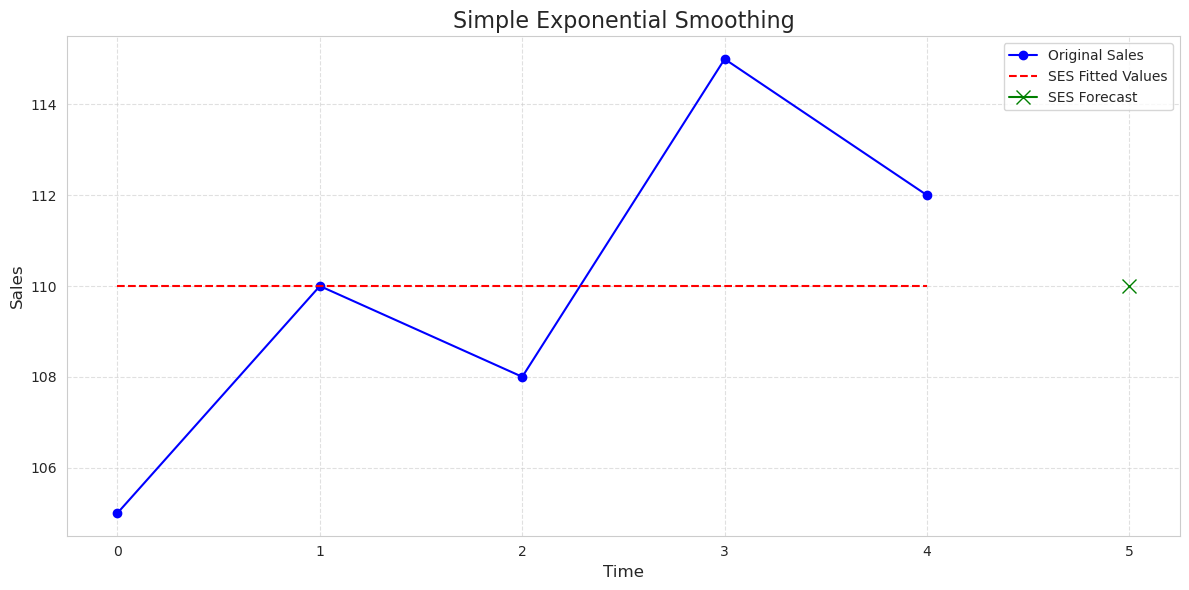


Holt's Linear Trend Method - Alpha: 0.000, Beta: 0.000
Holt Forecast for next 3 periods: [66.74616403 67.51115306 68.27614209]


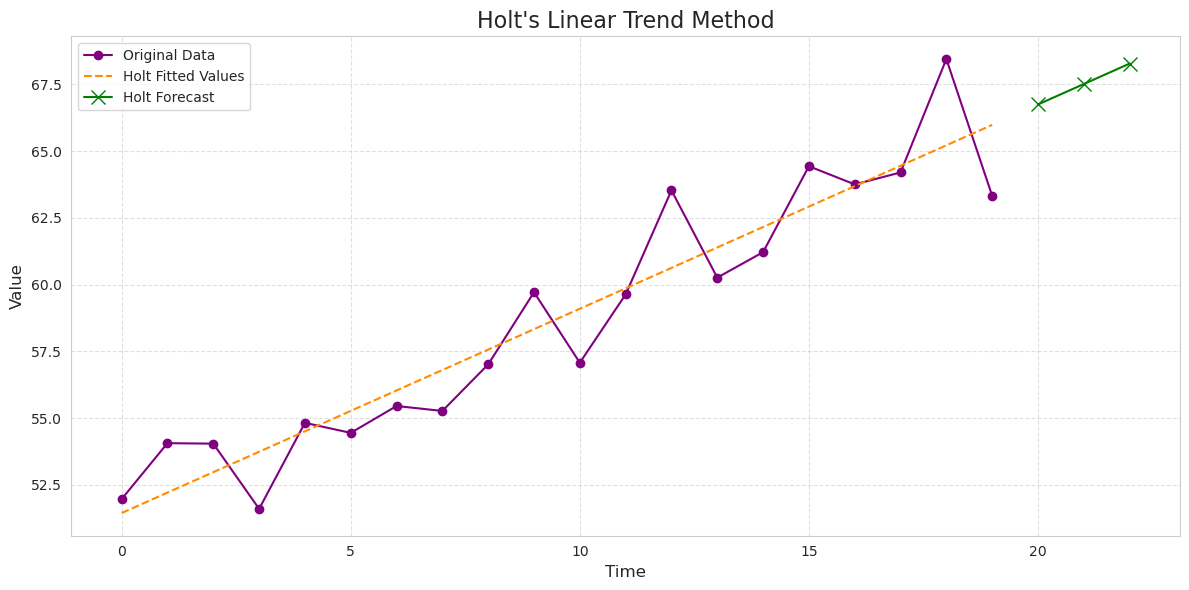


Holt-Winters' Seasonal Method (Additive) - Alpha: 0.000, Beta: 0.000, Gamma: 0.000
Holt-Winters Forecast for next 8 periods: [134.26910991 118.79518074  97.111006   119.54949796 135.77519877
 120.3012696   98.61709486 121.05558682]


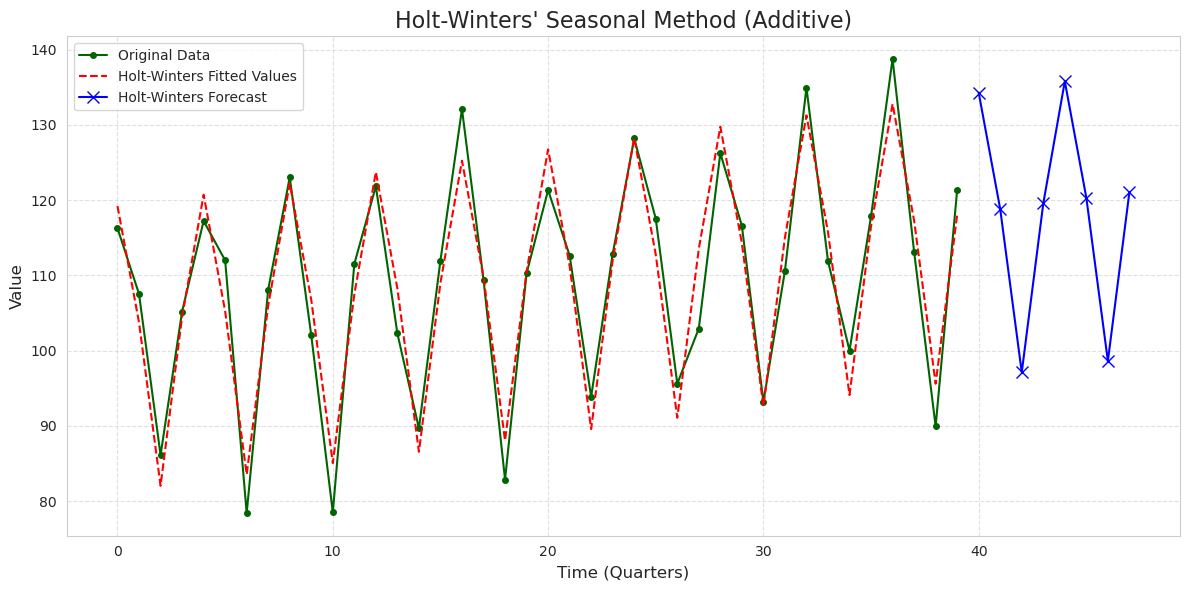

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

print("\n--- Time Series Models: Exponential Smoothing ---")

# --- 1. Simple Exponential Smoothing (SES) ---
# Problem Statement Data
sales_ses = np.array([105, 110, 108, 115, 112])
initial_forecast_ses = 100 # For manual calculation comparison

# Fit SES model
# The smoothing_level parameter is alpha
fit_ses = SimpleExpSmoothing(sales_ses, initialization_method="estimated").fit() # Let statsmodels estimate alpha
# Or, if you want to fix alpha for demonstration:
# fit_ses_fixed_alpha = SimpleExpSmoothing(sales_ses, initialization_method="known", initial_level=initial_forecast_ses).fit(smoothing_level=0.3)

print(f"\nSimple Exponential Smoothing (SES) - Estimated Alpha: {fit_ses.params['smoothing_level']:.3f}")
print(f"SES Forecast for next period: {fit_ses.forecast(1)[0]:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(sales_ses, label='Original Sales', marker='o', color='blue')
plt.plot(fit_ses.fittedvalues, label='SES Fitted Values', linestyle='--', color='red')
plt.plot(len(sales_ses), fit_ses.forecast(1)[0], marker='x', markersize=10, color='green', label='SES Forecast')
plt.title('Simple Exponential Smoothing', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- 2. Holt's Linear Trend Method ---
# Simulate data with trend
np.random.seed(46)
data_holt = 0.8 * np.arange(1, 21) + 50 + np.random.normal(0, 2, 20)

fit_holt = Holt(data_holt, initialization_method="estimated").fit()
print(f"\nHolt's Linear Trend Method - Alpha: {fit_holt.params['smoothing_level']:.3f}, Beta: {fit_holt.params['smoothing_trend']:.3f}")
print(f"Holt Forecast for next 3 periods: {fit_holt.forecast(3)}")

plt.figure(figsize=(12, 6))
plt.plot(data_holt, label='Original Data', marker='o', color='purple')
plt.plot(fit_holt.fittedvalues, label='Holt Fitted Values', linestyle='--', color='darkorange')
plt.plot(np.arange(len(data_holt), len(data_holt) + 3), fit_holt.forecast(3), marker='x', markersize=10, color='green', label='Holt Forecast')
plt.title('Holt\'s Linear Trend Method', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# --- 3. Holt-Winters' Seasonal Method ---
# Simulate data with trend and seasonality (e.g., quarterly data over years)
np.random.seed(47)
time_hw = np.arange(1, 41) # 40 quarters (10 years)
data_hw = 0.5 * time_hw + 100 + 20 * np.sin(2 * np.pi * time_hw / 4) + np.random.normal(0, 5, 40)

# Fit Holt-Winters model (additive seasonality)
# seasonal_periods=4 for quarterly data
fit_hw = ExponentialSmoothing(data_hw, seasonal_periods=4, trend='add', seasonal='add', initialization_method="estimated").fit()
print(f"\nHolt-Winters' Seasonal Method (Additive) - Alpha: {fit_hw.params['smoothing_level']:.3f}, Beta: {fit_hw.params['smoothing_trend']:.3f}, Gamma: {fit_hw.params['smoothing_seasonal']:.3f}")
print(f"Holt-Winters Forecast for next 8 periods: {fit_hw.forecast(8)}")

plt.figure(figsize=(12, 6))
plt.plot(data_hw, label='Original Data', marker='o', color='darkgreen', markersize=4)
plt.plot(fit_hw.fittedvalues, label='Holt-Winters Fitted Values', linestyle='--', color='red')
plt.plot(np.arange(len(data_hw), len(data_hw) + 8), fit_hw.forecast(8), marker='x', markersize=8, color='blue', label='Holt-Winters Forecast')
plt.title('Holt-Winters\' Seasonal Method (Additive)', fontsize=16)
plt.xlabel('Time (Quarters)', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



  $Y_1 = 0.8 * \epsilon_0 + \\epsilon_1 = 0.8 \\times 0 + 2 = \\mathbf{2}$
  $Y_2 = 0.8 \\times \\epsilon_1 + \\epsilon_2 = 0.8 \\times 2 + (-1) = 1.6 - 1 = \\mathbf{0.6}$
  $Y_3 = 0.8 \\times \\epsilon_2 + \\epsilon_3 = 0.8 \\times (-1) + 3 = -0.8 + 3 = \\mathbf{2.2}$
